# Bar plots

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
export_folder = './plotting/'
Path.mkdir(Path(export_folder), exist_ok=True)

In [3]:
bayer_dense_net = {
    'name': 'Bayer DenseNet',
    'rgb_values': [0.950, 0.786, 0.782],
    'hyperspectral_values': [0.949, 0.855, 0.848]
}

conv_40_1 = {
    'name': 'Conv 40 1',
    'rgb_values': [0.765,0.717,0.717],
    'hyperspectral_values': [0.840,0.790,0.792]
}

bayer_unet = {
    'name': 'Bayer U-Net',
    'rgb_values': [0.996,0.598,0.636],
    'hyperspectral_values': [0.997,0.581,0.600]
}

In [4]:
def add_plot(fig, subplot, values):
    width = 0.35
    
    ax = fig.add_subplot(subplot)
    ax.set_title(values['name'])
    length = len(values['rgb_values'])
    bar2 = ax.bar(np.arange(length)+width, values['hyperspectral_values'], width)
    bar1 = ax.bar(np.arange(length), values['rgb_values'], width)
    

    ax.set_xticks(np.arange(len(values['rgb_values']))+ width / 2)
    ax.set_xticklabels(['train','acc','best acc'])
    ax.set_yticks(np.linspace(0,1,5))
    ax.legend((bar1, bar2), ('rgb', 'hyperspectral'))
    return fig
    

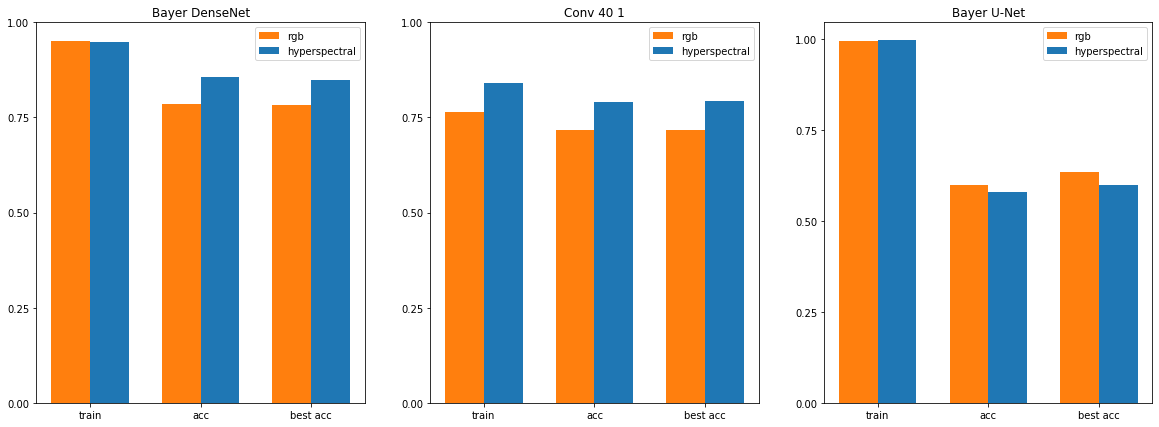

In [5]:
fig = plt.figure(figsize=(20,7))

fig = add_plot(fig, 131, bayer_dense_net)
fig = add_plot(fig, 132, conv_40_1)
fig = add_plot(fig, 133, bayer_unet)

plt.savefig(f'{export_folder}/combined.png')

plt.show()

# Spectral plots

## DenseNet

In [30]:
def create_spectral_plot(name, train, accuracy):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax1 = ax.plot(x,train)
    ax2 = ax.plot(x, accuracy)
    
    ax.set_title(name)
    ax.set_xlabel('Color channels')
    ax.legend(('Training', 'Test'), fontsize='x-large')

In [31]:
x = range(1,10)
bayer_train = [0.909,0.912,0.947,0.956,0.921,0.933,0.936,0.93,0.935]
bayer_accuracy = [0.762 ,0.838,0.86,0.866,0.877,0.883,0.886,0.886, 0.888] 

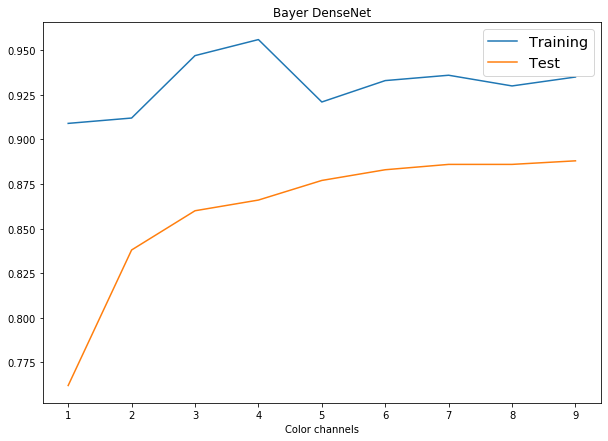

In [32]:
create_spectral_plot('Bayer DenseNet', bayer_train, bayer_accuracy)
plt.savefig(f'{export_folder}/spectraldense.png')

In [33]:
conv401_train = [0.755 ,0.815 ,0.836 ,0.84,0.938 ,0.939 ,0.94 ,0.943 ,0.943]
conv401_accuracy = [0.7,0.759,0.787,0.788,0.886,0.891,0.891,0.892,0.891]


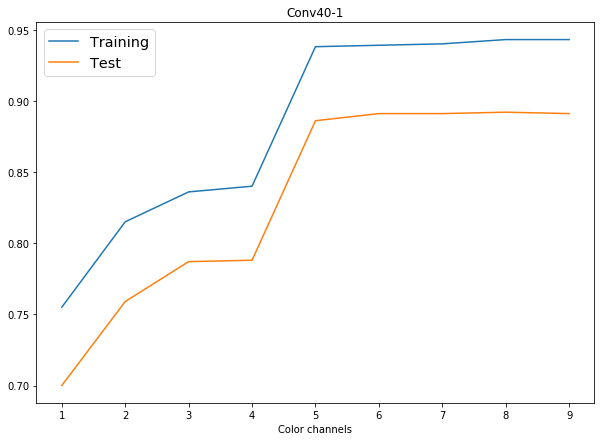

In [34]:
create_spectral_plot('Conv40-1', conv401_train, conv401_accuracy)
plt.savefig(f'{export_folder}/spectralconv.png')